In [23]:
import mysql.connector as mysql
import pandas as pd
import folium
import requests
import googlemaps
from geopy.distance import geodesic
import numpy as np
from tqdm import tqdm
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from matplotlib import font_manager
from matplotlib import rc

#database-1.c9ks828mszs7.ap-northeast-2.rds.amazonaws.com


In [9]:
remote = mysql.connect (
    host = "database-1.c9ks828mszs7.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "roschool",
    password = "1234",
    database = "roschool"
)

In [10]:
cursor = remote.cursor(buffered=True)

cursor.execute("""
                SELECT ed.education, count(ed.education) as count  FROM company_info co, recruit_info re, education_info ed
                WHERE (co.comp_id = re.comp_name_id) AND (re.education_id = ed.education_id) AND ed.education != "정보없음"
                GROUP BY ed.education
                ORDER BY count DESC
""")

result = cursor.fetchall()

df = pd.DataFrame(result)

df.head()

,0,1
0,대졸이상,109
1,초대졸이상,43
2,학력무관,34
3,석사이상,14
4,박사이상,1


In [11]:
df.columns = ["학력", "수"]

df

,학력,수
0,대졸이상,109
1,초대졸이상,43
2,학력무관,34
3,석사이상,14
4,박사이상,1
5,고졸이상,1


In [12]:
df.drop(index=4, inplace=True)
df.drop(index=5, inplace=True)
df

,학력,수
0,대졸이상,109
1,초대졸이상,43
2,학력무관,34
3,석사이상,14


In [13]:
# 기업규모 정렬 순서 설정
order = ["학력무관", "초대졸이상", "대졸이상", "석사이상"]
df["학력"] = pd.Categorical(df["학력"], categories=order, ordered=True)

# DataFrame 정렬
df = df.sort_values(by=["학력"]).reset_index(drop=True)

# 결과 출력
df


,학력,수
0,학력무관,34
1,초대졸이상,43
2,대졸이상,109
3,석사이상,14


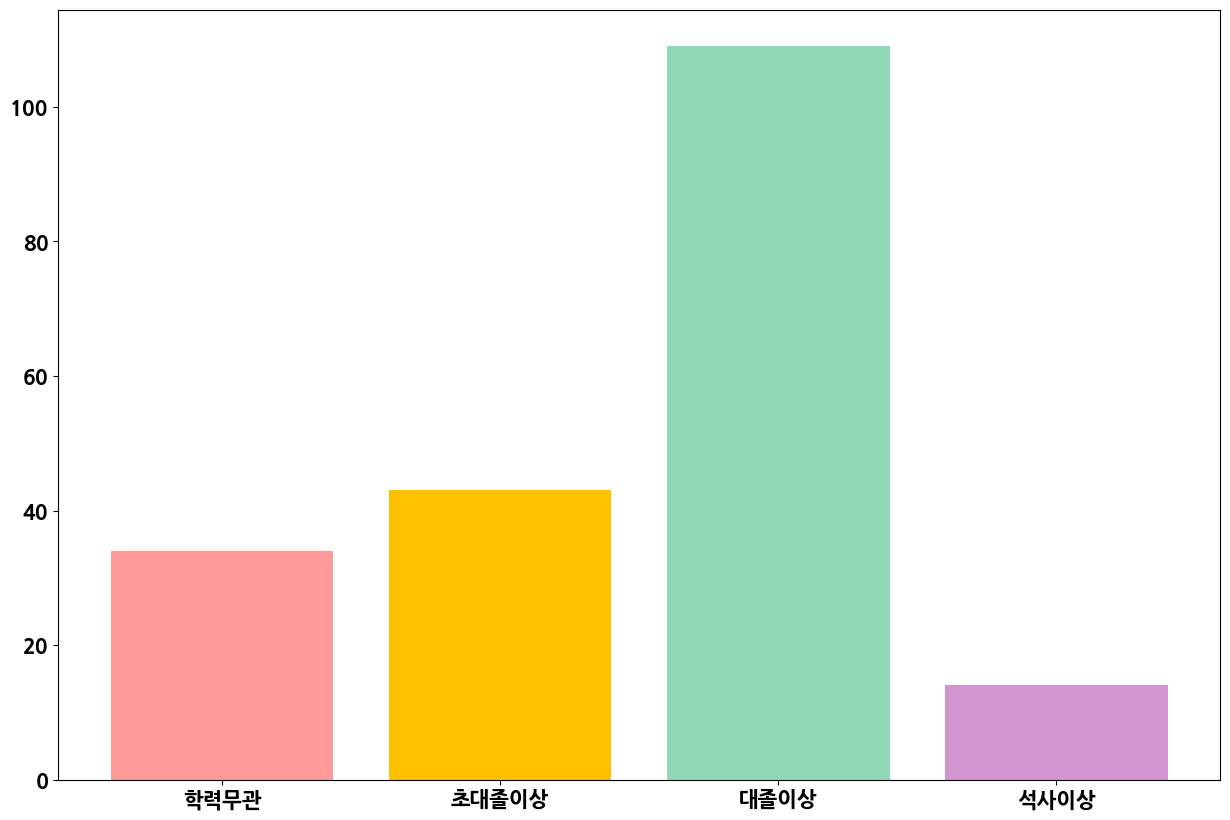

In [24]:
# 한글 폰트 설정 (Linux: NanumGothic)
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 경로 확인 필수
font = font_manager.FontProperties(fname=font_path)
rc('font', family=font.get_name())

# 색상 설정
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#2E7B26'][:len(df)]

# 막대 그래프 생성
plt.figure(figsize=(15, 10))
plt.bar(df["학력"], df["수"], color=colors[:len(df)])

# 글씨 크기와 볼드체 적용
plt.xlabel("", fontsize=14, fontweight='bold')
plt.ylabel("", fontsize=14, fontweight='bold')
# plt.title("경력별 데이터 분포", fontsize=16, fontweight='bold')

# x축 라벨 크기 설정
plt.xticks(fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')

# 그래프 출력
plt.show()


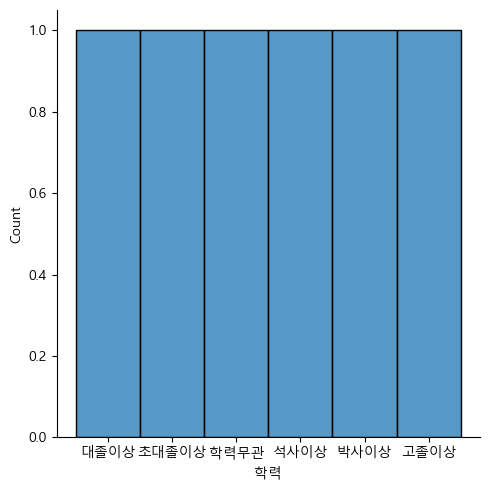

In [ ]:
# 히스토 그램
sns.displot(data=df, x="학력")


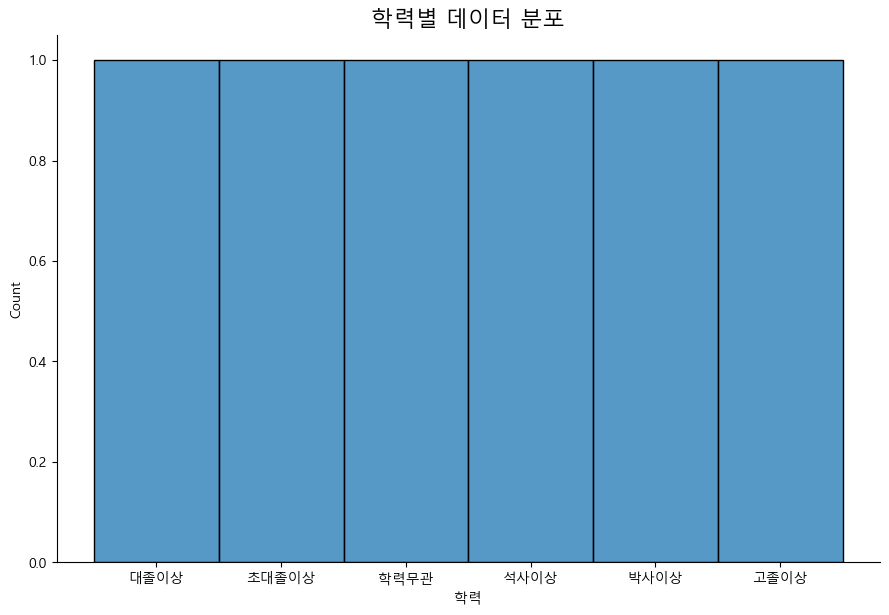

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정
rc('font', family='Malgun Gothic')

# displot 사용
sns.displot(data=df, x="학력", kind="hist", stat="count", height=6, aspect=1.5)

# 그래프 제목 설정
plt.title("학력별 데이터 분포", fontsize=16)

# 그래프 출력
plt.show()


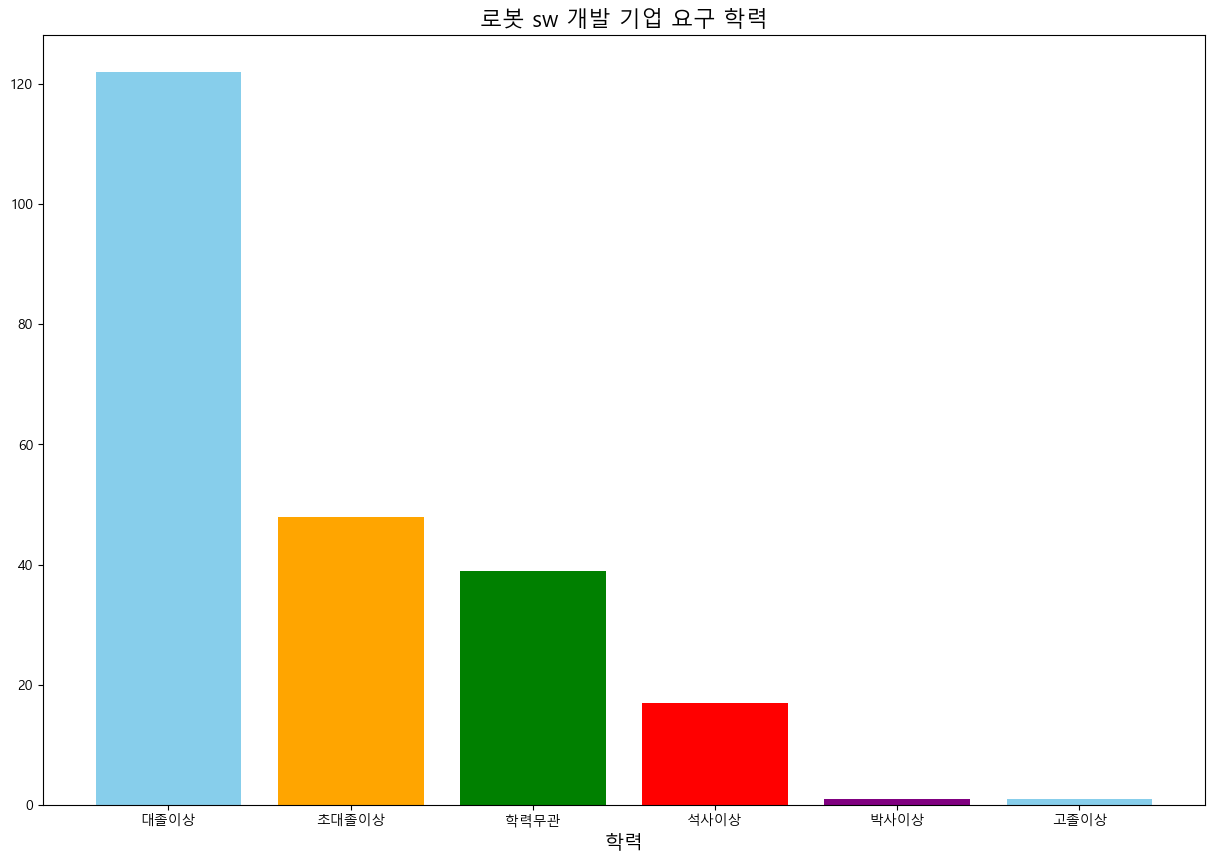

In [27]:

rc('font', family='Malgun Gothic')# 한글
colors = ['skyblue', 'orange', 'green', 'red', 'purple']

plt.figure(figsize=(15, 10))
plt.bar(df["학력"], df["수"], color=colors[:len(df)])

plt.title("로봇 sw 개발 기업 요구 학력", fontsize = 16)
plt.xlabel("학력", fontsize = 14)

plt.show()

In [48]:
remote.close()